In [85]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10 as data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import BatchNormalization, Dropout
import seaborn as sns;

In [86]:
import pandas as pd
#immport data
data_frame = pd.read_excel("01train.xlsx")
data_frame1 = pd.read_excel("data_anysis.xlsx")
data_frame.describe()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000
mean,38.984541,45.294944,52.784871,656.507337,0.225864,75.190124,3.319754,0.109481,0.015342,2553.566565,2209.062206,0.297463,0.833713,1.319754,0.428132
std,14.540574,15.546263,64.786127,717.237752,0.232311,14.008806,0.684632,0.090865,0.125137,1829.663990,1810.428997,0.572666,12.506317,0.684632,0.494871
min,7.902370,8.047619,2.562656,-8000.000000,0.000000,47.889610,3.000000,0.003690,-1.043000,0.675070,0.000000,0.000000,-600.000000,1.000000,0.000000
25%,28.642857,34.880952,43.504429,224.700000,0.030303,62.761544,3.000000,0.058475,-0.055860,948.100000,579.800000,0.000000,0.802960,1.000000,0.000000
50%,38.976190,47.023810,53.053333,413.100000,0.142857,76.677489,3.000000,0.085307,0.005701,2276.000000,1898.000000,0.000000,0.937191,1.000000,0.000000
75%,50.119048,57.345238,60.650000,834.969651,0.371429,86.821260,3.000000,0.143723,0.078966,3839.552040,3455.073327,1.000000,0.987258,1.000000,1.000000
max,75.619048,79.547619,4000.000000,4412.000000,0.966667,100.000000,6.000000,1.776212,1.208233,8410.000000,8129.000000,5.000000,500.000000,4.000000,1.000000


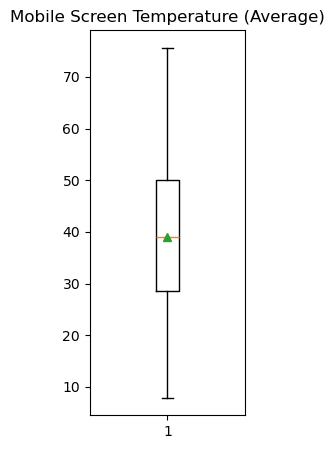

C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34722 (\N{CJK UNIFIED IDEOGRAPH-87A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24149 (\N{CJK UNIFIED IDEOGRAPH-5E55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28331 (\N{CJK UNIFIED I

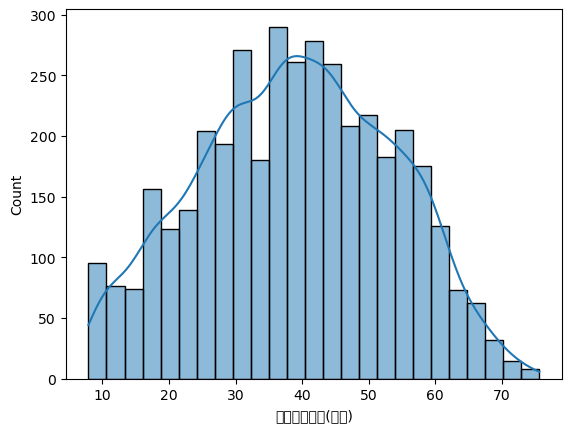

偏態(Skewness): -0.06
峰度(Kurtosis): -0.70


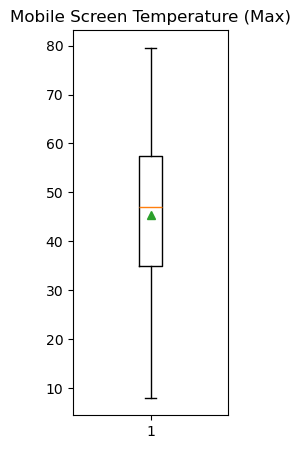

C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34722 (\N{CJK UNIFIED IDEOGRAPH-87A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24149 (\N{CJK UNIFIED IDEOGRAPH-5E55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28331 (\N{CJK UNIFIED I

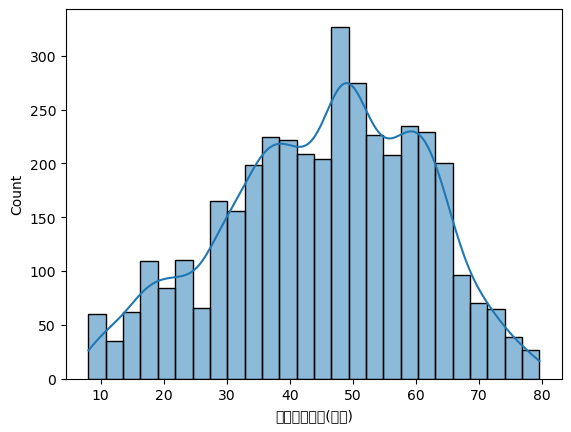

偏態(Skewness): -0.27
峰度(Kurtosis): -0.57


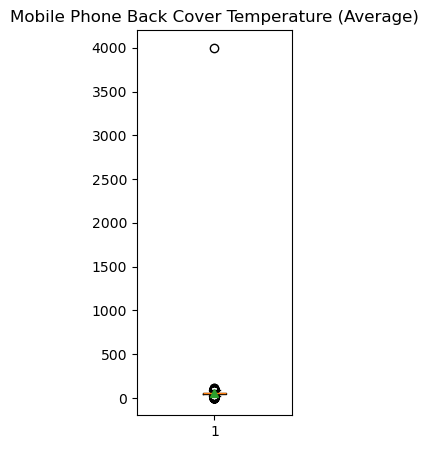

C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32972 (\N{CJK UNIFIED IDEOGRAPH-80CC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33995 (\N{CJK UNIFIED IDEOGRAPH-84CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28331 (\N{CJK UNIFIED I

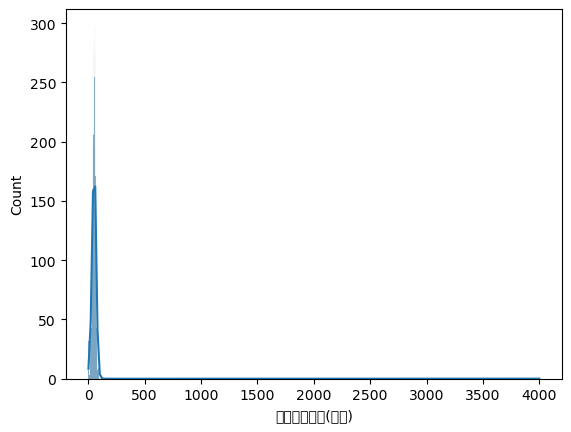

偏態(Skewness): 57.98
峰度(Kurtosis): 3533.85


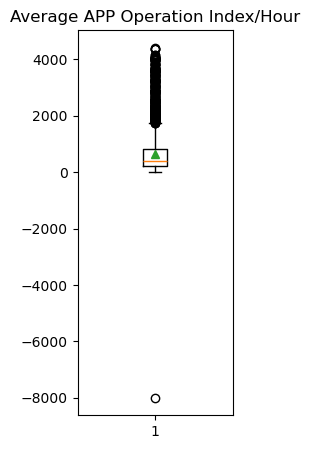

C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25351 (\N{CJK UNIFIED I

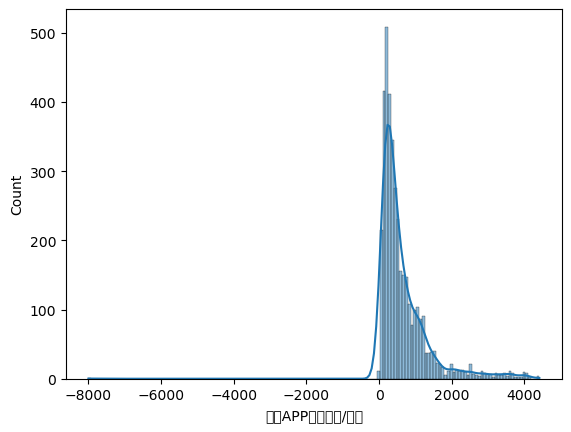

偏態(Skewness): 1.87
峰度(Kurtosis): 11.67


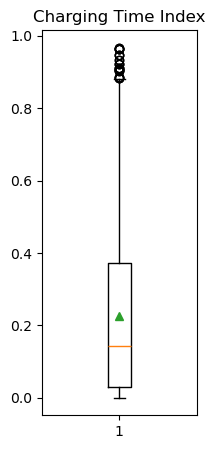

C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20805 (\N{CJK UNIFIED IDEOGRAPH-5145}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38651 (\N{CJK UNIFIED IDEOGRAPH-96FB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25351 (\N{CJK UNIFIED I

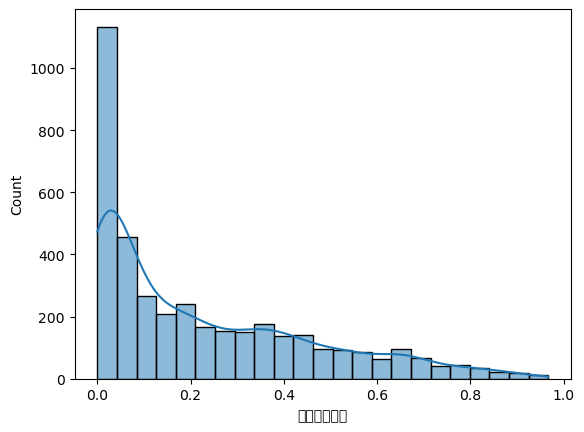

偏態(Skewness): 1.02
峰度(Kurtosis): 0.09


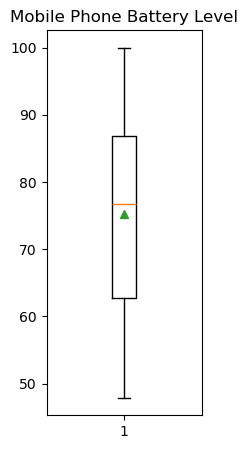

C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38651 (\N{CJK UNIFIED IDEOGRAPH-96FB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27744 (\N{CJK UNIFIED IDEOGRAPH-6C60}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED I

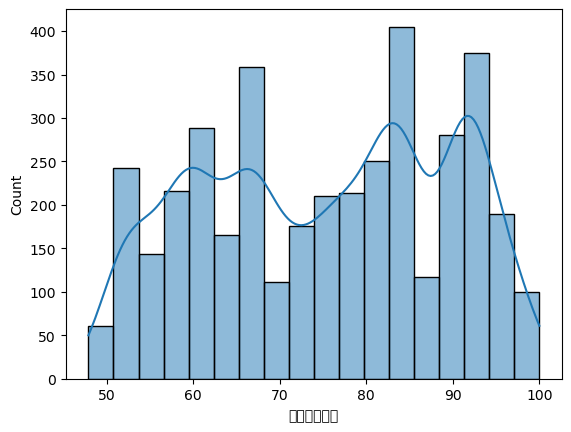

偏態(Skewness): -0.12
峰度(Kurtosis): -1.23


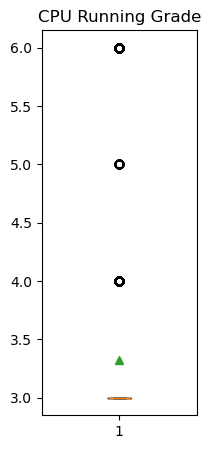

C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36305 (\N{CJK UNIFIED IDEOGRAPH-8DD1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38542 (\N{CJK UNIFIED IDEOGRAPH-968E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32026 (\N{CJK UNIFIED IDEOGRAPH-7D1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


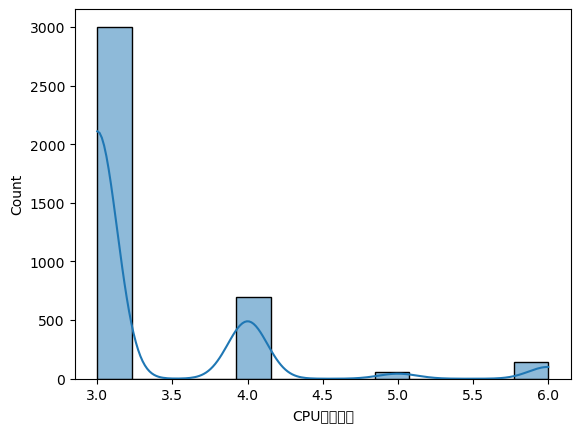

偏態(Skewness): 2.53
峰度(Kurtosis): 6.40


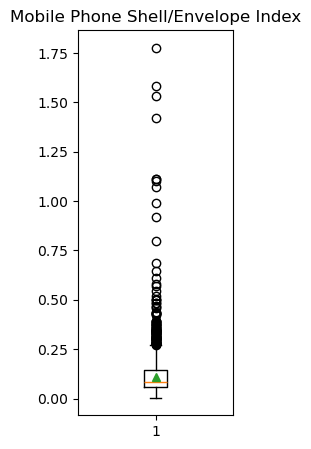

C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22806 (\N{CJK UNIFIED IDEOGRAPH-5916}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27580 (\N{CJK UNIFIED IDEOGRAPH-6BBC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21253 (\N{CJK UNIFIED I

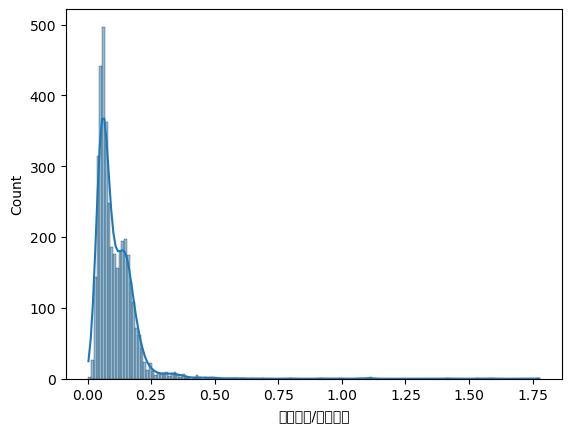

偏態(Skewness): 7.09
峰度(Kurtosis): 92.95


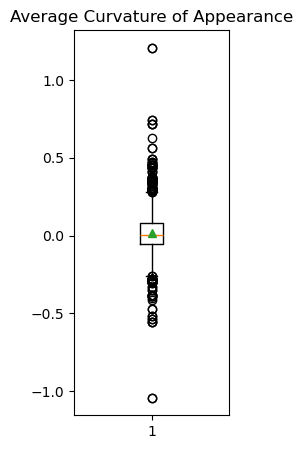

C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22806 (\N{CJK UNIFIED IDEOGRAPH-5916}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26354 (\N{CJK UNIFIED I

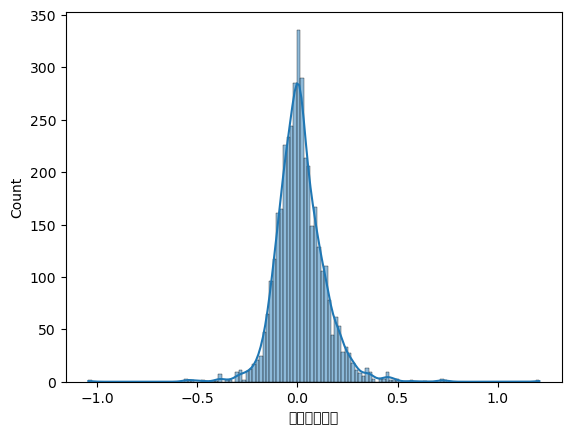

偏態(Skewness): 0.60
峰度(Kurtosis): 9.38


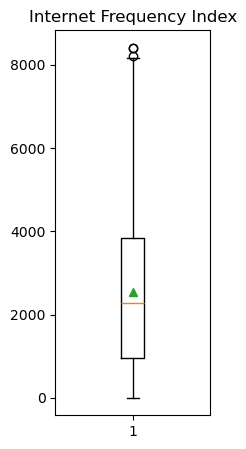

C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32178 (\N{CJK UNIFIED IDEOGRAPH-7DB2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25351 (\N{CJK UNIFIED I

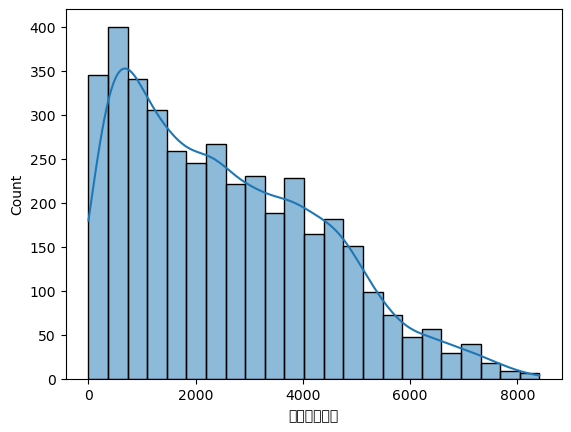

偏態(Skewness): 0.62
峰度(Kurtosis): -0.38


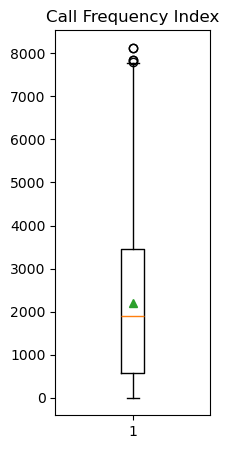

C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35441 (\N{CJK UNIFIED IDEOGRAPH-8A71}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25351 (\N{CJK UNIFIED I

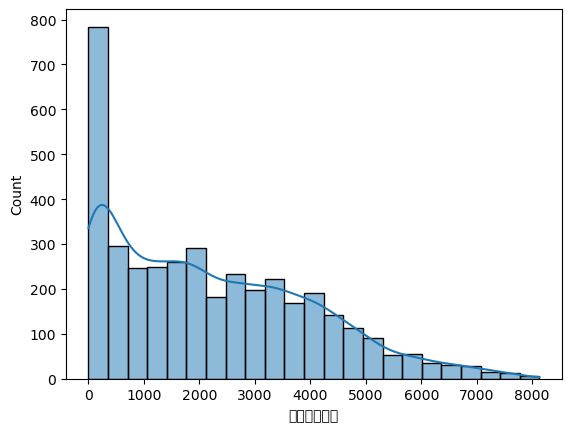

偏態(Skewness): 0.66
峰度(Kurtosis): -0.31


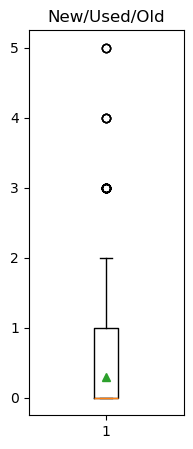

C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32769 (\N{CJK UNIFIED I

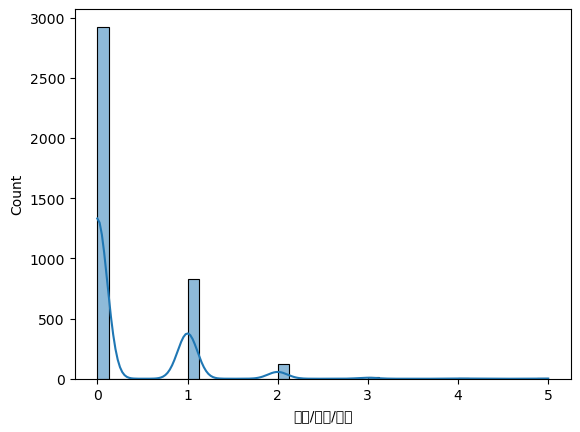

偏態(Skewness): 2.31
峰度(Kurtosis): 7.61


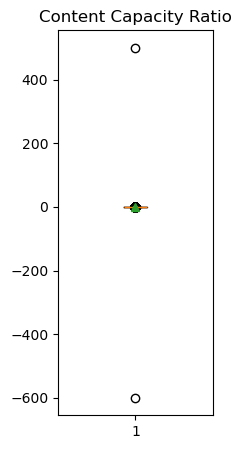

C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20839 (\N{CJK UNIFIED IDEOGRAPH-5167}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23481 (\N{CJK UNIFIED IDEOGRAPH-5BB9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED I

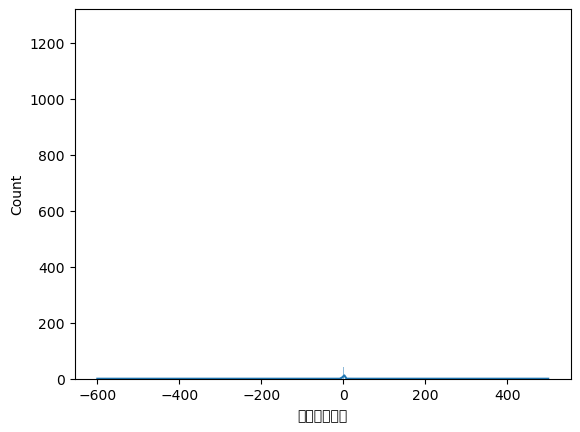

偏態(Skewness): -12.13
峰度(Kurtosis): 2015.74


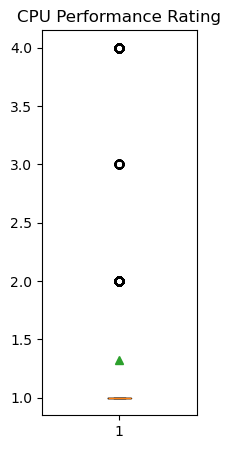

C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25928 (\N{CJK UNIFIED IDEOGRAPH-6548}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31561 (\N{CJK UNIFIED IDEOGRAPH-7B49}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32026 (\N{CJK UNIFIED IDEOGRAPH-7D1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


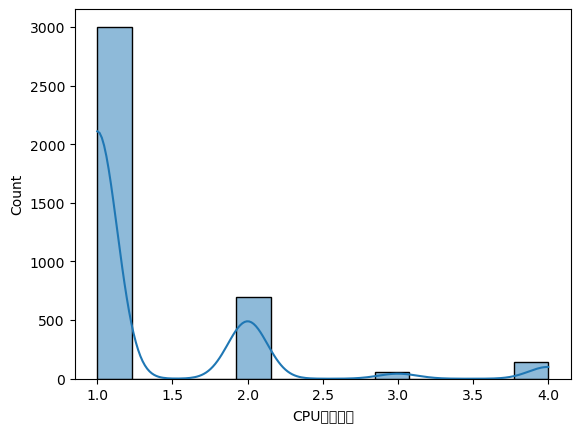

偏態(Skewness): 2.53
峰度(Kurtosis): 6.40


In [87]:
#資料分布
name_list=['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標','手機電池電量','CPU跑分階級','手機外殼/包膜指標','外型平均曲率','上網頻率指標','通話頻率指標','新機/二手/老舊','內容容量比率','CPU效能等級']
name_pre=['Mobile Screen Temperature (Average)','Mobile Screen Temperature (Max)','Mobile Phone Back Cover Temperature (Average)','Average APP Operation Index/Hour','Charging Time Index','Mobile Phone Battery Level','CPU Running Grade','Mobile Phone Shell/Envelope Index','Average Curvature of Appearance','Internet Frequency Index','Call Frequency Index','New/Used/Old','Content Capacity Ratio','CPU Performance Rating']

for i in range(14):
    plt.figure(figsize=(2,5))
    plt.boxplot(data_frame[name_list[i]],showmeans=True)   
    plt.title(name_pre[i])
    plt.show()
    sns.histplot(data_frame[name_list[i]], kde=True)
    plt.show()
    print("偏態(Skewness): {:.2f}".format(data_frame[name_list[i]].skew()))
    print("峰度(Kurtosis): {:.2f}".format(data_frame[name_list[i]].kurt()))
    print('==================================================================================================')

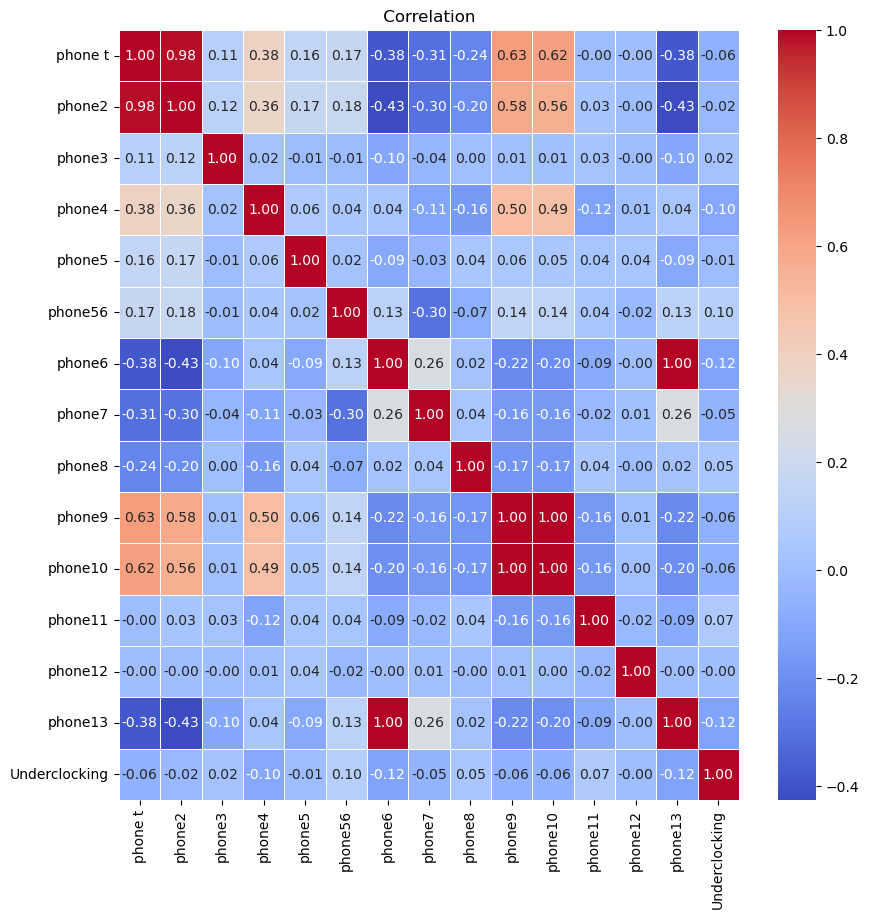

In [88]:

corr_matrix = data_frame1.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f') #各參數代表的意思請查閱seaborn.heatmap官網的說明
plt.title(' Correlation ')
plt.show()

手機螢幕溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)


C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34722 (\N{CJK UNIFIED IDEOGRAPH-87A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24149 (\N{CJK UNIFIED IDEOGRAPH-5E55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28331 (\N{CJK UNIFIED I

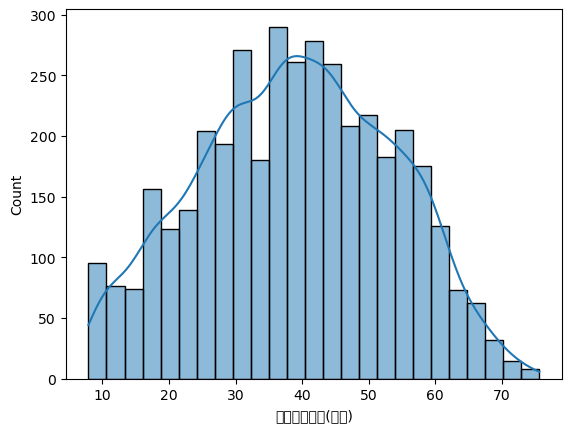

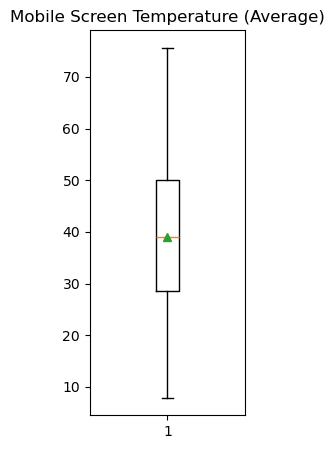

手機螢幕溫度(最大)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)


C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34722 (\N{CJK UNIFIED IDEOGRAPH-87A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24149 (\N{CJK UNIFIED IDEOGRAPH-5E55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28331 (\N{CJK UNIFIED I

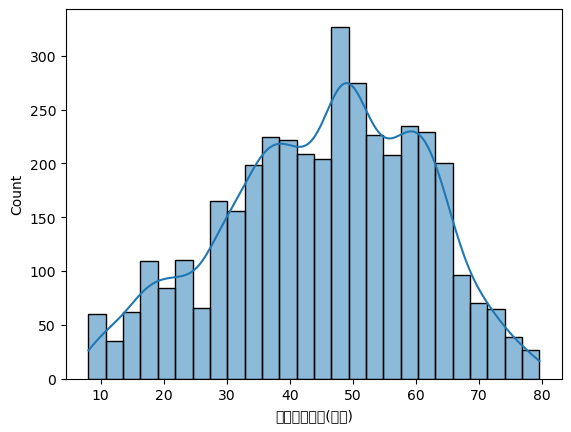

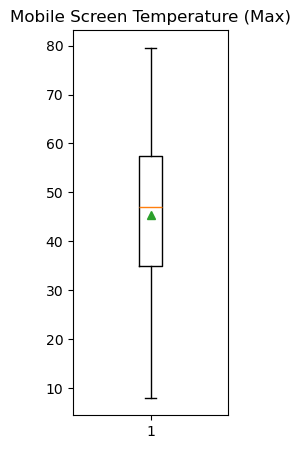

手機背蓋溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3783,)


C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32972 (\N{CJK UNIFIED IDEOGRAPH-80CC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33995 (\N{CJK UNIFIED IDEOGRAPH-84CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28331 (\N{CJK UNIFIED I

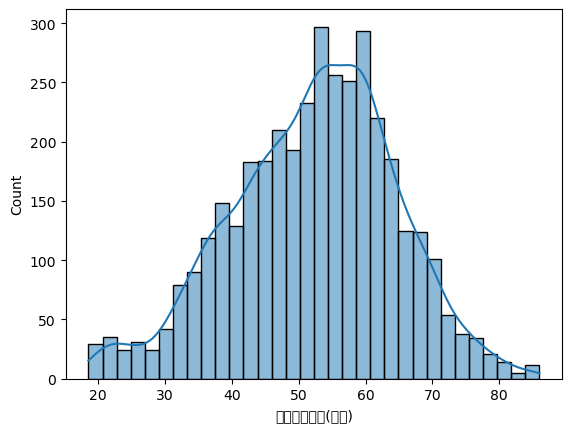

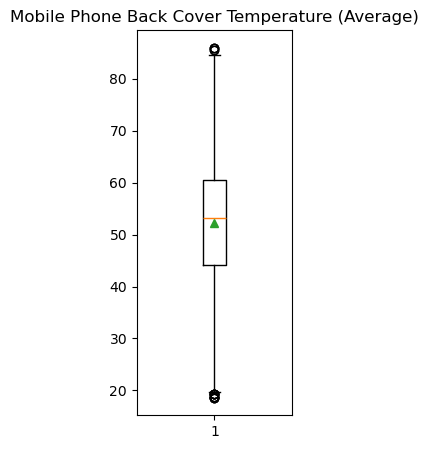

平均APP運作指標/小時
Shape Of The Before Ouliers:  (3783,)
Shape Of The After Ouliers:  (3528,)


C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25351 (\N{CJK UNIFIED I

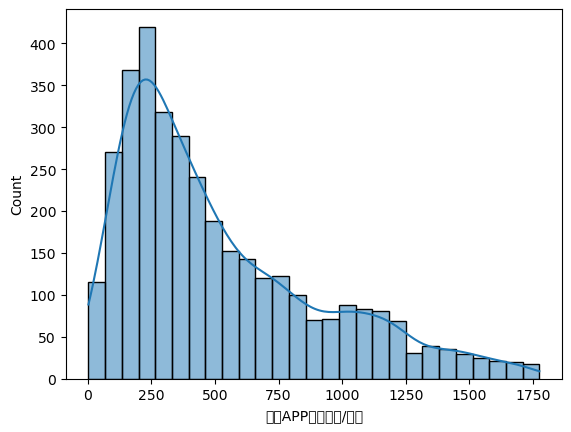

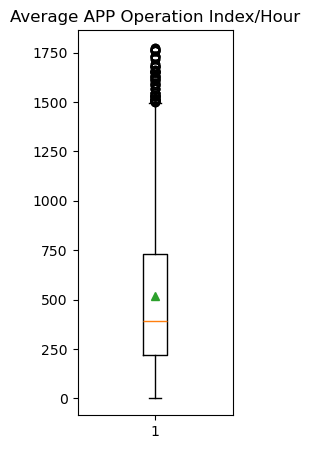

充電時間指標
Shape Of The Before Ouliers:  (3528,)
Shape Of The After Ouliers:  (3504,)


C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20805 (\N{CJK UNIFIED IDEOGRAPH-5145}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38651 (\N{CJK UNIFIED IDEOGRAPH-96FB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25351 (\N{CJK UNIFIED I

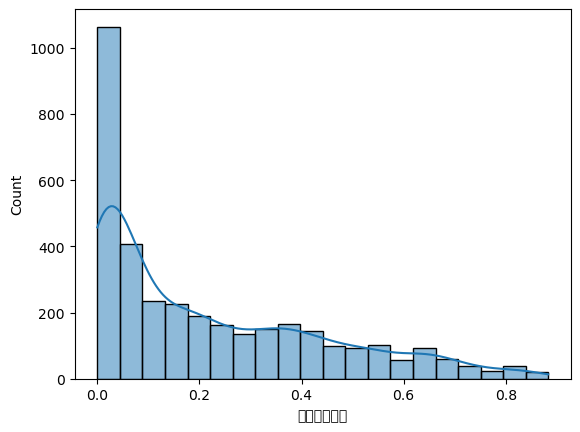

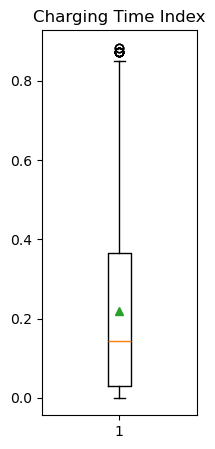

手機電池電量
Shape Of The Before Ouliers:  (3504,)
Shape Of The After Ouliers:  (3504,)


C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38651 (\N{CJK UNIFIED IDEOGRAPH-96FB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27744 (\N{CJK UNIFIED IDEOGRAPH-6C60}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED I

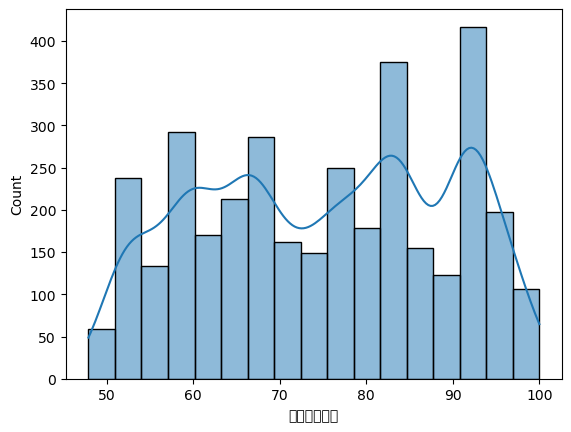

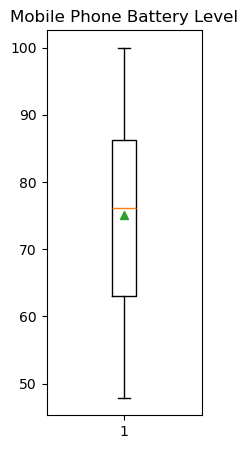

CPU跑分階級
Shape Of The Before Ouliers:  (3504,)
Shape Of The After Ouliers:  (2870,)


C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36305 (\N{CJK UNIFIED IDEOGRAPH-8DD1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38542 (\N{CJK UNIFIED IDEOGRAPH-968E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32026 (\N{CJK UNIFIED IDEOGRAPH-7D1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


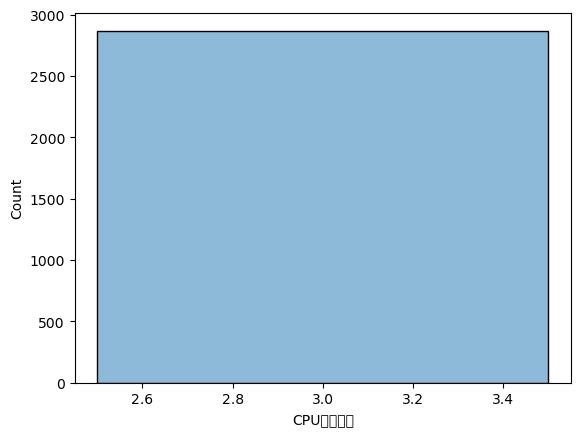

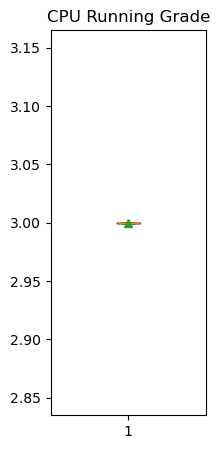

手機外殼/包膜指標
Shape Of The Before Ouliers:  (2870,)
Shape Of The After Ouliers:  (2860,)


C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22806 (\N{CJK UNIFIED IDEOGRAPH-5916}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27580 (\N{CJK UNIFIED IDEOGRAPH-6BBC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21253 (\N{CJK UNIFIED I

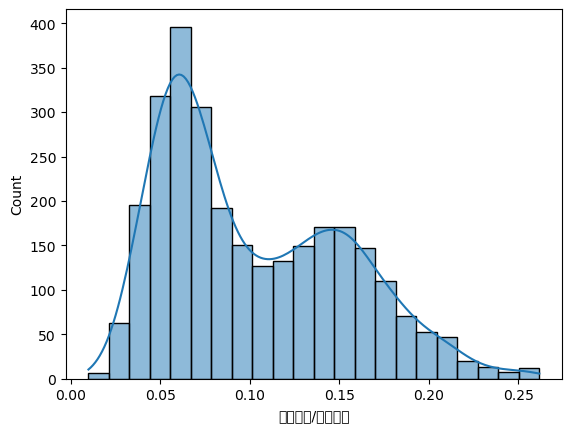

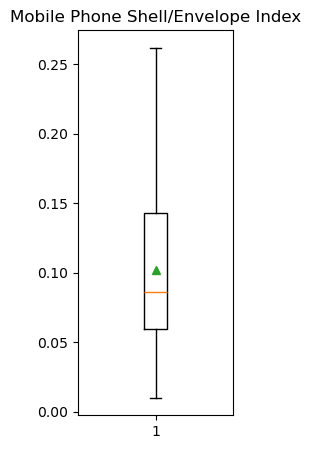

外型平均曲率
Shape Of The Before Ouliers:  (2860,)
Shape Of The After Ouliers:  (2765,)


C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22806 (\N{CJK UNIFIED IDEOGRAPH-5916}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26354 (\N{CJK UNIFIED I

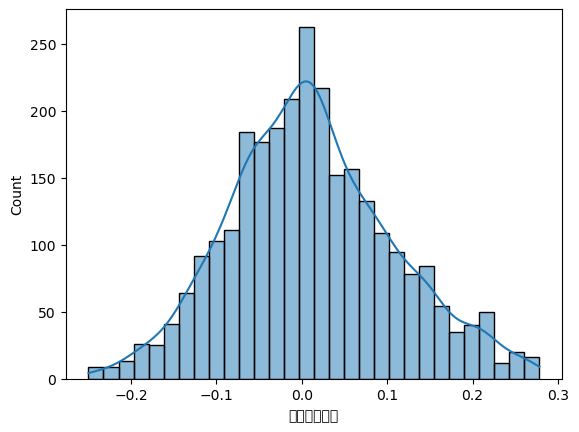

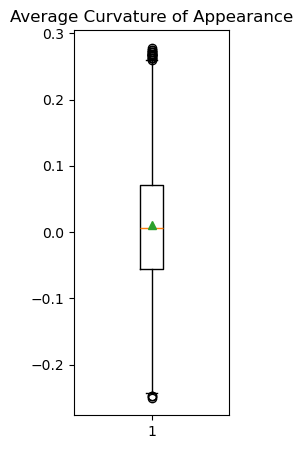

上網頻率指標
Shape Of The Before Ouliers:  (2765,)
Shape Of The After Ouliers:  (2748,)


C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32178 (\N{CJK UNIFIED IDEOGRAPH-7DB2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25351 (\N{CJK UNIFIED I

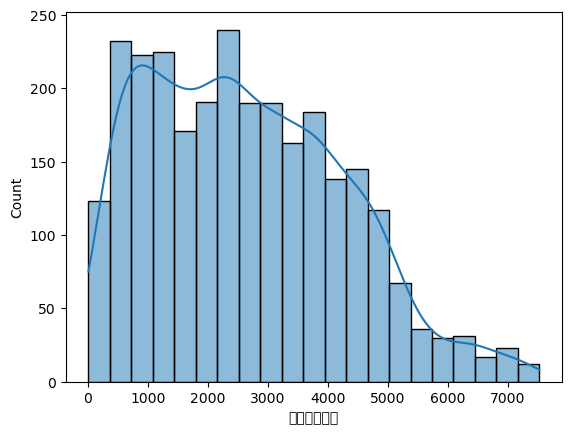

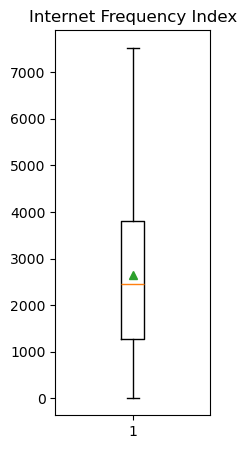

通話頻率指標
Shape Of The Before Ouliers:  (2748,)
Shape Of The After Ouliers:  (2740,)


C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35441 (\N{CJK UNIFIED IDEOGRAPH-8A71}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25351 (\N{CJK UNIFIED I

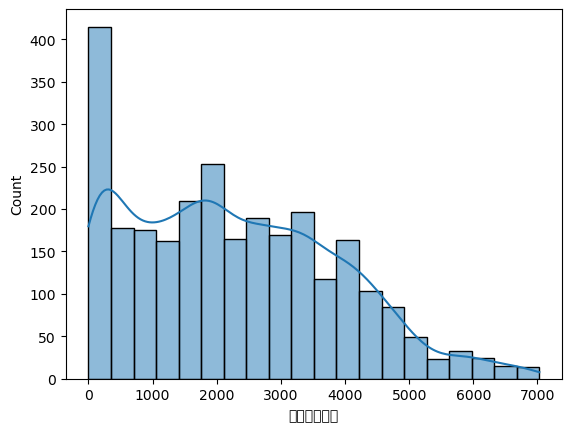

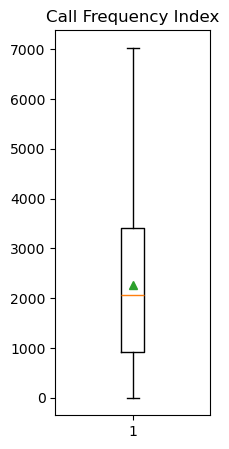

新機/二手/老舊
Shape Of The Before Ouliers:  (2740,)
Shape Of The After Ouliers:  (2724,)


C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32769 (\N{CJK UNIFIED I

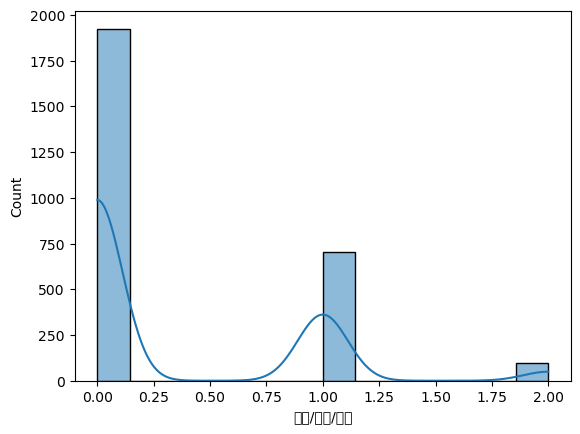

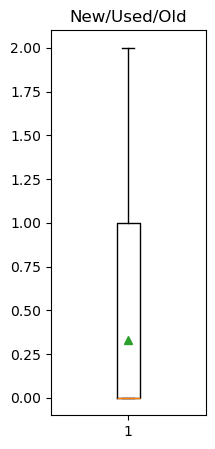

內容容量比率
Shape Of The Before Ouliers:  (2724,)
Shape Of The After Ouliers:  (2555,)


C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20839 (\N{CJK UNIFIED IDEOGRAPH-5167}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23481 (\N{CJK UNIFIED IDEOGRAPH-5BB9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED I

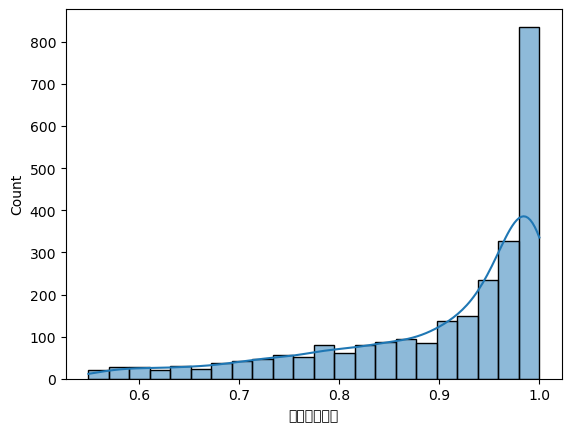

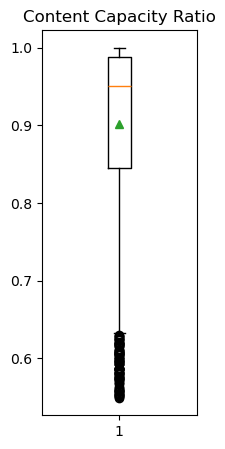

CPU效能等級
Shape Of The Before Ouliers:  (2555,)
Shape Of The After Ouliers:  (2555,)


C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25928 (\N{CJK UNIFIED IDEOGRAPH-6548}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31561 (\N{CJK UNIFIED IDEOGRAPH-7B49}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jerom\anaconda3\envs\110810042\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32026 (\N{CJK UNIFIED IDEOGRAPH-7D1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


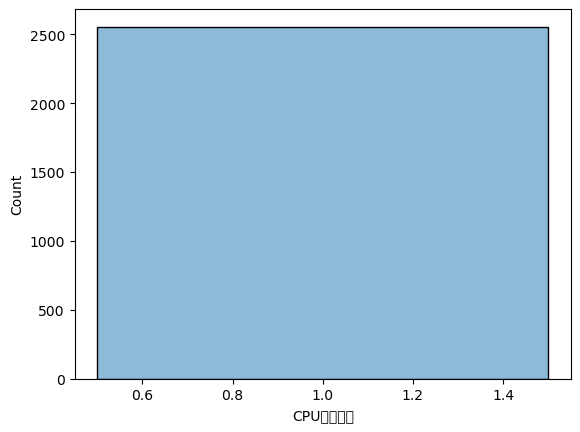

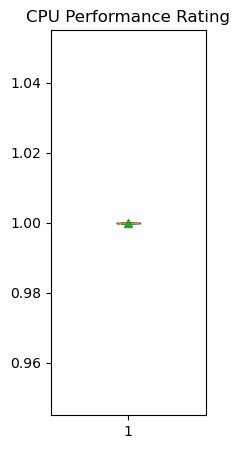

In [89]:
#資料前處理


name_list_outlier =['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標','手機電池電量','CPU跑分階級','手機外殼/包膜指標','外型平均曲率','上網頻率指標','通話頻率指標','新機/二手/老舊','內容容量比率','CPU效能等級']
name_pre_outlier = ['Mobile Screen Temperature (Average)','Mobile Screen Temperature (Max)','Mobile Phone Back Cover Temperature (Average)','Average APP Operation Index/Hour','Charging Time Index','Mobile Phone Battery Level','CPU Running Grade','Mobile Phone Shell/Envelope Index','Average Curvature of Appearance','Internet Frequency Index','Call Frequency Index','New/Used/Old','Content Capacity Ratio','CPU Performance Rating']


for i, name in enumerate(name_list_outlier):
    print(name)
    print("Shape Of The Before Ouliers: ", data_frame[name].shape)
    
    # 计算IQR
    Q1 = np.percentile(data_frame[name], 25)
    Q3 = np.percentile(data_frame[name], 75)
    IQR = Q3 - Q1
    n = 1.5

    # 定义离群值范围
    lower_bound = Q1 - n * IQR
    upper_bound = Q3 + n * IQR

    # 过滤离群值
    filtered_entries = ((data_frame[name] >= lower_bound) & (data_frame[name] <= upper_bound))
    data_frame = data_frame[filtered_entries]
    
    print("Shape Of The After Ouliers: ",data_frame[name].shape)

    # 绘制直方图
    sns.histplot(data_frame[name], kde=True)
    plt.show()
    
    # 绘制箱形图
    plt.figure(figsize=(2, 5))
    plt.boxplot(data_frame[name], showmeans=True)   
    plt.title(name_pre_outlier[i])
    plt.show()

    print('===================================================================================================================')



In [90]:
data_frame.describe()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.0,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.0,2555.000000
mean,41.617539,48.499804,53.966349,571.027821,0.229848,74.795148,3.0,0.101973,0.008650,2692.677366,2329.708791,0.324853,0.902017,1.0,0.439922
std,12.136904,12.572320,11.275630,390.727791,0.230330,14.207783,0.0,0.051734,0.095690,1611.126794,1608.372665,0.529613,0.111765,0.0,0.496475
min,15.601610,17.166667,19.207986,2.806544,0.000000,47.889610,3.0,0.016377,-0.249800,11.370000,0.000000,0.000000,0.549146,1.0,0.000000
25%,32.119048,38.785714,46.689265,260.750000,0.032609,62.319625,3.0,0.058849,-0.055764,1368.500000,1025.000000,0.000000,0.845747,1.0,0.000000
50%,40.650027,48.309524,54.633333,456.100000,0.156250,75.757576,3.0,0.085901,0.003955,2521.000000,2150.000000,0.000000,0.950284,1.0,0.000000
75%,50.392857,58.023810,61.393333,817.100000,0.380952,87.460295,3.0,0.143599,0.068670,3832.000000,3455.073327,1.000000,0.988579,1.0,1.000000
max,75.619048,79.547619,86.000000,1768.000000,0.883117,100.000000,3.0,0.261862,0.278179,7313.000000,7029.000000,2.000000,1.000000,1.0,1.000000


In [91]:
import pandas as pd

y_data = data_frame['Underclocking'].to_numpy()

feature_ex = ['手機螢幕溫度(平均)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標','手機電池電量','CPU跑分階級','手機外殼/包膜指標','通話頻率指標','新機/二手/老舊','CPU效能等級']
x_data = data_frame[feature_ex].to_numpy()






In [92]:
#data arrange
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()



x_data_normalized = min_max_scaler.fit_transform(x_data)
x_data_standardized = standard_scaler.fit_transform(x_data_normalized)
print(x_data_standardized)

[[ 1.41482014 -0.95383765 -0.87041257 ...  2.30047142 -0.61349834
   0.        ]
 [-0.90178036 -1.5350104   0.67889565 ... -0.08014898 -0.61349834
   0.        ]
 [-0.78276563  0.82024636  0.04549371 ... -1.44877172 -0.61349834
   0.        ]
 ...
 [-0.09994433 -0.39263574 -1.05830391 ...  0.19482583 -0.61349834
   0.        ]
 [ 2.39392309 -1.52804951 -0.32337743 ...  0.93609268 -0.61349834
   0.        ]
 [-0.08817155  0.3530709  -0.78184254 ...  0.5722998  -0.61349834
   0.        ]]


In [93]:
from sklearn.model_selection import train_test_split
# 使用 train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_data_standardized, y_data, test_size=0.1, random_state=1)

print("Xtrain shape:", Xtrain.shape)
print("Xtrain type:", type(Xtrain))
print("Xtest shape:", Xtest.shape)
print("Xtest type:", type(Xtest))
print("ytrain shape:", ytrain.shape)
print("ytrain type:", type(ytrain))
print("ytest shape:", ytest.shape)
print("ytest type:", type(ytest))

Xtrain shape: (2299, 10)
Xtrain type: <class 'numpy.ndarray'>
Xtest shape: (256, 10)
Xtest type: <class 'numpy.ndarray'>
ytrain shape: (2299,)
ytrain type: <class 'numpy.ndarray'>
ytest shape: (256,)
ytest type: <class 'numpy.ndarray'>


In [94]:

import tensorflow as tf
l2_regularizer = tf.keras.regularizers.l2(0.01)
input_features = x_data.shape[1]
print( x_data.shape[1])
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_features,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),    
])
model.summary()



10


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,497 (13.66 KB)

 Trainable params: 3,497 (13.66 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(Xtrain, ytrain, batch_size=32, epochs=100,validation_split=0.1 ) #default batch=32
print(history.history.keys())


Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5443 - loss: 0.6897 - val_accuracy: 0.5261 - val_loss: 0.6972
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.5549 - loss: 0.6906 - val_accuracy: 0.5261 - val_loss: 0.6944
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.5721 - loss: 0.6838 - val_accuracy: 0.5261 - val_loss: 0.6932
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.5737 - loss: 0.6833 - val_accuracy: 0.5261 - val_loss: 0.6920
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.5631 - loss: 0.6862 - val_accuracy: 0.5261 - val_loss: 0.6995
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.5690 - loss: 0.6849 - val_accuracy: 0.5261 - val_loss: 0.6930
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.5658 - loss: 0.6857 - val_accuracy: 0.5261 - val_loss: 0.6932
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.5722 - loss: 0.6839 - val_accura

In [102]:
results = model.evaluate(Xtest, ytest)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.5062 - loss: 0.7076
Final test set loss: 0.695572
Final test set accuracy: 0.539062


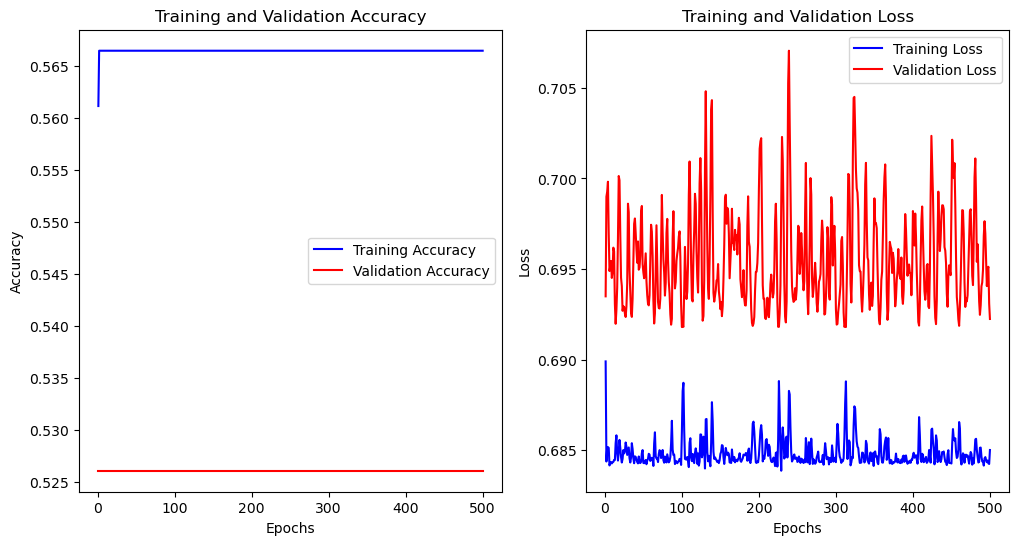

In [97]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_ = range(1,len(acc)+1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_, acc, 'b-', label='Training Accuracy')
plt.plot(epochs_, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_, loss, 'b-', label='Training Loss')
plt.plot(epochs_, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [98]:
test=pd.read_excel("01test.xlsx")

feature_ex = ['手機螢幕溫度(平均)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標','手機電池電量','CPU跑分階級','手機外殼/包膜指標','通話頻率指標','新機/二手/老舊','CPU效能等級']
x_data = test[feature_ex].to_numpy()

x_data_normalized = min_max_scaler.fit_transform(x_data)
x_test_sc = standard_scaler.fit_transform(x_data_normalized)
print(x_test_sc)

[[ 1.76639630e+00  5.05094266e-01 -8.73059901e-02 ...  1.09016804e-02
  -4.94298220e-01 -4.77675324e-01]
 [ 7.58062170e-01  8.98100291e-01 -1.99008185e-01 ...  7.58952534e-01
   1.24849530e+00 -4.77675324e-01]
 [ 1.46982744e+00 -6.85442156e-01  8.17327036e-02 ...  1.91793559e+00
   1.24849530e+00 -4.77675324e-01]
 ...
 [ 1.90265767e+00 -8.83097003e-01  1.14498312e+00 ...  6.92299991e-01
  -4.94298220e-01  1.00112093e+00]
 [ 1.37845217e+00  2.35564929e-01  5.52307907e-01 ... -1.21696374e-03
  -4.94298220e-01  1.00112093e+00]
 [ 7.29206821e-01  3.68717029e-01 -6.30517328e-01 ...  1.51471525e+00
   1.24849530e+00 -4.77675324e-01]]


In [99]:
predicted_ans = model.predict(x_test_sc)
print(np.mean(predicted_ans))
predicted_classes = (predicted_ans > 0.4).astype(int)


print(predicted_classes .shape)

if predicted_classes .ndim > 1:
    predicted_classes  = predicted_classes .squeeze()
print(predicted_classes .shape)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.4588107
(1777, 1)
(1777,)


In [100]:
my_submission = pd.DataFrame({'id': test.id, 'Underclocking': predicted_classes })
my_submission.to_csv('submission.csv', index=False)